In [5]:
import pandas as pd #load module for data manipulation

In [6]:
pval_data = {'GSE94259 pano': [0.0001, 0.0001, 0.0002, 0.0009, 0.0003, 0.0013, 0.0003, 0.0001, 0.0001, 0.0001], 
             'GSE153441 pano': [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
             'GSE123278 pano': [0.0146, 0.0188, 0.0001, 0.0058, 0.0006, 0.0005, 0.0012, 0.0008, 0.0144, 0.0005],
             'GSE117446 pano': [0.0216, 0.01, 0.0781, 0.0006, 0.0106, 0.0148, 0.0145, 0.0003, 0.0005, 0.0003],
             'GSE94259 JQ1': [0.0001, 0.1095, 0.0001, 0.0001, 0.0001, 0.0063, 0.0001, 0.0001, 0.0004, 0.012],
             'GSE94259 JQ1+pano': [0.0002, 0.0001, 0.0001, 0.0001, 0.0001, 0.0004,0.0001, 0.0001, 0.0001, 0.0001],
             'GSE94259 THZ1': [0.0056, 0.0577, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0003],
             'GSE94259 THZ1+pano': [0.0074, 0.0757, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
             'GSE153441 CBL0137': [0.0001, 0.0001, 0.0004, 0.0001, 0.0022, 0.0001, 0.0001, 0.0097, 0.0001, 0.0177],
             'GSE153441 CBL0137+pano': [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
             'GSE123278 Mar': [0.0021, 0.1007, 0.0001, 0.0007, 0.0028, 0.0001, 0.0157, 0.0136, 0.0555, 0.0138],
             'GSE123278 Mar+pano': [0.0001, 0.0067, 0.0001, 0.0022, 0.0001, 0.0001, 0.0005, 0.0005, 0.0131, 0.0004],
             'GSE117446 5AZA+pano': [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]}
list_of_items = ['SEMA3C', 'PARM1', 'KCNK2', 'ITPRIPL1', 'CTPS2', 'EBP', 'LIN9', 'GPX7', 'PHF19', 'ASCL1']

pval_df = pd.DataFrame(data = pval_data)
pval_df = pd.concat([pd.Series(list_of_items, name='Items'), pval_df], axis = 1)
print(pval_df.head(5))

      Items  GSE94259 pano  GSE153441 pano  GSE123278 pano  GSE117446 pano  \
0    SEMA3C         0.0001          0.0001          0.0146          0.0216   
1     PARM1         0.0001          0.0001          0.0188          0.0100   
2     KCNK2         0.0002          0.0001          0.0001          0.0781   
3  ITPRIPL1         0.0009          0.0001          0.0058          0.0006   
4     CTPS2         0.0003          0.0001          0.0006          0.0106   

   GSE94259 JQ1  GSE94259 JQ1+pano  GSE94259 THZ1  GSE94259 THZ1+pano  \
0        0.0001             0.0002         0.0056              0.0074   
1        0.1095             0.0001         0.0577              0.0757   
2        0.0001             0.0001         0.0001              0.0001   
3        0.0001             0.0001         0.0001              0.0001   
4        0.0001             0.0001         0.0001              0.0001   

   GSE153441 CBL0137  GSE153441 CBL0137+pano  GSE123278 Mar  \
0             0.0001         

In [7]:
from scipy import stats #module for Stouffer's z-score method combined p-value calculation
import numpy as np #module to save data to file

In [8]:
#performs Stouffer's z-score method combined p-value calculation on pval_df
item_array = []
results_zscore_array = []
results_pvalue_array = []
results_total_array = []

for row_num, row_data in pval_df.iterrows():
    temp_y = list(pval_df.iloc[row_num])
    item = temp_y[0]
    temp_y.pop(0)
    combo_Zscore, combo_pvalue = stats.combine_pvalues(pvalues = temp_y, method = 'stouffer')
    combo_Zscore = (round(combo_Zscore, 1))
    combo_pvalue = format(combo_pvalue, '.2e')
    
    print(str(item) + ': Stouffers z-score is ' + str(combo_Zscore))
    print(str(item) + ': Combined p-value ' + str(combo_pvalue))
    print()
    
    item_array.append(item)
    results_zscore_array.append(combo_Zscore)
    results_pvalue_array.append(combo_pvalue)
    total = str(combo_Zscore) + ' (' + str(combo_pvalue) + ')'
    results_total_array.append(total)
    
#combine and save data to file
df_to_save = pd.DataFrame(np.column_stack([results_zscore_array, results_pvalue_array]),
                          columns=['Stouffers z-score', 'Combined p-value'],
                          index=item_array)
df_to_save.to_csv("results.txt", sep ='\t', index=True)

SEMA3C: Stouffers z-score is 11.5
SEMA3C: Combined p-value 4.09e-31

PARM1: Stouffers z-score is 9.6
PARM1: Combined p-value 3.09e-22

KCNK2: Stouffers z-score is 12.6
KCNK2: Combined p-value 8.22e-37

ITPRIPL1: Stouffers z-score is 12.4
ITPRIPL1: Combined p-value 1.45e-35

CTPS2: Stouffers z-score is 12.3
CTPS2: Combined p-value 4.57e-35

EBP: Stouffers z-score is 12.2
EBP: Combined p-value 1.15e-34

LIN9: Stouffers z-score is 12.2
LIN9: Combined p-value 2.52e-34

GPX7: Stouffers z-score is 12.3
GPX7: Combined p-value 8.16e-35

PHF19: Stouffers z-score is 11.8
PHF19: Combined p-value 3.16e-32

ASCL1: Stouffers z-score is 11.8
ASCL1: Combined p-value 3.31e-32



In [9]:
Tscore_data = {'GSE94259 pano': [7.821243, 7.604738, -7.0093336, -5.267419, -6.544339, -8.982096, -4.93646, -6.757459, -10.048273, -8.694056],
             'GSE153441 pano': [11.680711, 12.074816, -11.449176, -11.1951, -12.151059, -11.3817425, -10.2028055, -8.67612, -8.015577, -11.921392],
             'GSE123278 pano': [2.850914, 2.6585867, -12.425876, -3.5838907, -5.7576213, -5.504274, -5.9356036, -5.0531406, -2.857499, -5.8547797],
             'GSE117446 pano': [2.5566387, 3.1392095, -1.6207118, -5.745179, -3.096055, -6.736411, -2.8413014, -2.856726, -5.88943, -6.6281586],
             'GSE94259 JQ1': [12.02438, 1.3723873, -7.6950254, -9.520486, -7.499248, -8.054378, -3.5129259, -7.191223, -6.2479544, -2.9975097],
             'GSE94259 JQ1+pano': [6.8720803, 7.376059, -8.020082, -9.883276, -8.237468, -10.444568, -6.3227687, -8.501102, -10.741374, -10.778365],
             'GSE94259 THZ1': [-3.6072824, -1.8394829, -8.252723, -9.863607, -8.071199, -10.016501, -10.533967, -7.840853, -10.184686, -6.433882],
             'GSE94259 THZ1+pano': [-3.37842, -1.642962, -8.221449, -10.365119, -8.1482935, -10.4818, -10.726375, -10.232171, -10.514942, -8.794684],
             'GSE153441 CBL0137': [8.261546, 7.832797, -6.261377, -10.106837, -4.418578, -3.166626, -9.899671, -9.31403, -9.909499, -2.703697],
             'GSE153441 CBL0137+pano': [11.681122, 10.909478, -12.113858, -10.372822, -11.962335, -12.23655, -11.459748, -12.110709, -12.173117, -12.247229],
             'GSE123278 Mar': [4.4741693, 1.4344357, -14.21621, -5.521664, -4.217423, -2.9057205, -10.078551, -2.793054, -1.8680348, -2.8902779],
             'GSE123278 Mar+pano': [10.062979, 3.4654338, -15.559147, -4.427477, -7.824739, -5.967614, -7.471067, -5.897484, -2.9330668, -6.1073937],
             'GSE117446 5AZA+pano': [10.380503, 8.183474, -9.281477, -10.515717, -11.842423, -11.820448, -9.138911, -9.77807, -8.364282, -9.145241]}
Tscore_df = pd.DataFrame(data = Tscore_data, index = list_of_items)
print(Tscore_df.head(5))

          GSE94259 pano  GSE153441 pano  GSE123278 pano  GSE117446 pano  \
SEMA3C         7.821243       11.680711        2.850914        2.556639   
PARM1          7.604738       12.074816        2.658587        3.139210   
KCNK2         -7.009334      -11.449176      -12.425876       -1.620712   
ITPRIPL1      -5.267419      -11.195100       -3.583891       -5.745179   
CTPS2         -6.544339      -12.151059       -5.757621       -3.096055   

          GSE94259 JQ1  GSE94259 JQ1+pano  GSE94259 THZ1  GSE94259 THZ1+pano  \
SEMA3C       12.024380           6.872080      -3.607282           -3.378420   
PARM1         1.372387           7.376059      -1.839483           -1.642962   
KCNK2        -7.695025          -8.020082      -8.252723           -8.221449   
ITPRIPL1     -9.520486          -9.883276      -9.863607          -10.365119   
CTPS2        -7.499248          -8.237468      -8.071199           -8.148293   

          GSE153441 CBL0137  GSE153441 CBL0137+pano  GSE123278 Mar  

In [10]:
#convert pval_df from pval floats to * string significance markers for p<0.05 for heatmap annotation
pval_df.drop(columns=pval_df.columns[0], axis=1, inplace=True)
studies = list(pval_df)

temp_value = ''
for col in pval_df:
    pval_df.loc[pval_df[col] < 0.05, col] = "o"
    pval_df.loc[pval_df[col] != "o", col] = " "

In [11]:
import math

#set color bar range
maxValues = Tscore_df.max()
highest_Tscore = max(maxValues)
minValues = Tscore_df.min()
lowest_Tscore = min(minValues)

if highest_Tscore > abs(lowest_Tscore):
    cmap_set_point = highest_Tscore
else:
    cmap_set_point = abs(lowest_Tscore)
cmap_set_point = math.ceil(cmap_set_point)

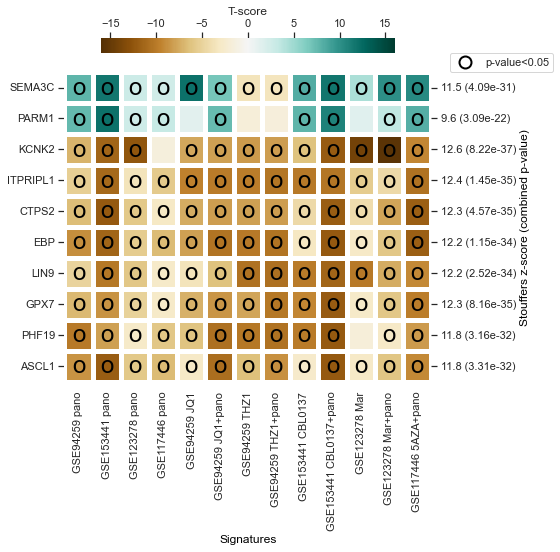

In [12]:
## load modules for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}) #sets up white background for heat map

fig, ax = plt.subplots(figsize = (8, 8))
ax.set_xlabel('Signatures', color = 'black')

ax = sns.heatmap(Tscore_df, cbar=False)
ax.set_yticklabels(labels=item_array, rotation=0)

    
ax2 = ax.twinx()

ax2 = sns.heatmap(Tscore_df, linewidth = 5,
                 cmap = 'BrBG', fmt = 's', center = 0, cbar_kws = {'shrink': 0.8, 'label': 'T-score', 'location':"top"},
                 vmin = (-1*cmap_set_point), vmax = cmap_set_point, 
                 annot=pval_df,
                 annot_kws={'fontsize': 24, 'fontstyle': 'normal', 'color':'black',
                       'rotation': 'horizontal', "va": 'center'})

ax2.set_yticklabels(labels=results_total_array, rotation=0)
ax.set_xlabel('Signatures', color = 'black')
ax2.set_ylabel('Stouffers z-score (combined p-value)', color = 'black')

legend_star = mlines.Line2D([], [], color='black', linestyle="None", markeredgewidth=2, fillstyle="none", marker='o', label='p-value<0.05')
plt.legend(handles=[legend_star], markerscale=2, bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

plt.tight_layout()
fig = ax.get_figure()
fig.savefig("StouffersHeatMap.jpg", format = 'jpg', dpi = 300)